In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


data_dir = "../input/leapgestrecog/leapGestRecog"
X = []  # List for images
y = []  # List for labels

for folder in os.listdir(data_dir):
    if folder.startswith("0"):
        user_path = os.path.join(data_dir, folder)
        for gesture_folder in os.listdir(user_path):
            gesture_path = os.path.join(user_path, gesture_folder)
            label = gesture_folder
            for img_file in os.listdir(gesture_path):
                img_path = os.path.join(gesture_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (64, 64))
                X.append(img)
                y.append(label)

# ✅ Convert to NumPy arrays AFTER all append calls
X = np.array(X).reshape(-1, 64, 64, 1) / 255.0
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)         # Converts labels to one-hot vectors
Dense(y.shape[1], activation='softmax')


<Dense name=dense, built=False>

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-03 14:57:12.641774: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.5834 - loss: 1.2022 - val_accuracy: 0.9909 - val_loss: 0.0367
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.9645 - loss: 0.1108 - val_accuracy: 0.9962 - val_loss: 0.0137
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.9767 - loss: 0.0669 - val_accuracy: 0.9978 - val_loss: 0.0072
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.9859 - loss: 0.0437 - val_accuracy: 0.9981 - val_loss: 0.0051
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.9871 - loss: 0.0359 - val_accuracy: 0.9987 - val_loss: 0.0050
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.9899 - loss: 0.0289 - val_accuracy: 0.9987 - val_loss: 0.0051
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.9922 - loss: 0.0245 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.9905 - loss: 0.0274 - 

In [6]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=le.classes_))


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
Accuracy: 0.999

Classification Report:
                precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       410
         02_l       1.00      1.00      1.00       417
      03_fist       0.99      0.99      0.99       366
04_fist_moved       1.00      1.00      1.00       404
     05_thumb       1.00      1.00      1.00       409
     06_index       1.00      1.00      1.00       377
        07_ok       1.00      1.00      1.00       403
08_palm_moved       1.00      1.00      1.00       392
         09_c       1.00      1.00      1.00       404
      10_down       1.00      1.00      1.00       418

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



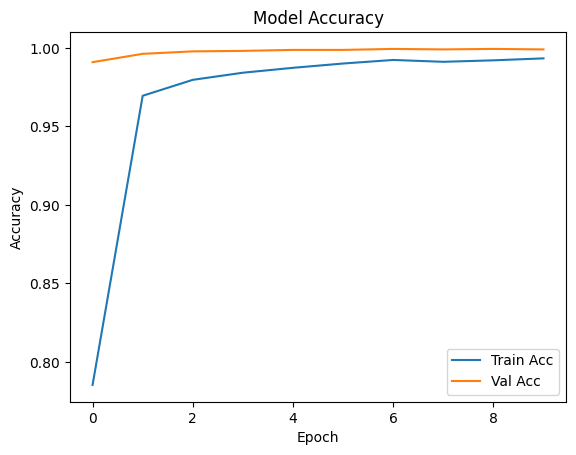

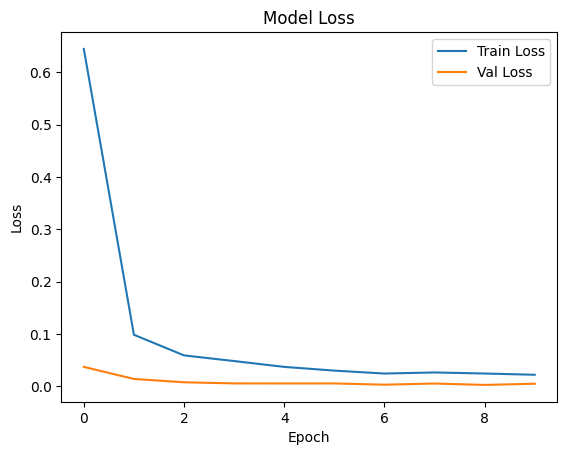

In [7]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


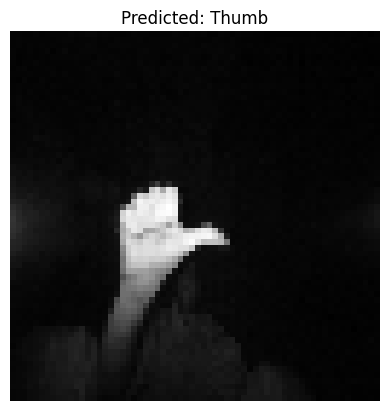

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def predict_and_show(image_path, model):
    img = load_img(image_path, target_size=(64, 64), color_mode='grayscale')  
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {class_labels[predicted_class]}')
    plt.axis('off')
    plt.show()
sample_image_path = "/kaggle/input/leapgestrecog/leapGestRecog/01/05_thumb/frame_01_05_0001.png"
predict_and_show(sample_image_path, model)
